In [1]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 지원 라이브러리 설치
#!pip install koreanize-matplotlib

In [4]:
# 한글 지원
import koreanize_matplotlib

In [ ]:
pd.set_option?

In [5]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력, default : 20
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_rows', 30)  # None으로 설정하면 모든 행 출력 default:60

In [6]:
# 출력 폭을 설정하여 긴 데이터 프레임도 잘리지 않도록 설정
# pd.set_option('display.width', 1000)  # 원하는 폭으로 설정

외부파일을 데이터 프레임으로 로딩하기

In [7]:
# df_stocks = pd.read_excel('stocks.xlsx')
df_stocks = pd.read_csv('stocks.csv')


In [8]:
df_stocks.shape

(2855, 23)

In [9]:
df_stocks.head(1)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,005930,삼성전자,KOSPI,NaN,53900,1,500,0.94,54500,54500,53700,6965539,377240465300,321771279445000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도


In [10]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            2855 non-null   object 
 1   Name            2855 non-null   object 
 2   Market          2855 non-null   object 
 3   Dept            1896 non-null   object 
 4   Close           2855 non-null   int64  
 5   ChangeCode      2855 non-null   int64  
 6   Changes         2855 non-null   int64  
 7   ChagesRatio     2855 non-null   float64
 8   Open            2855 non-null   int64  
 9   High            2855 non-null   int64  
 10  Low             2855 non-null   int64  
 11  Volume          2855 non-null   int64  
 12  Amount          2855 non-null   int64  
 13  Marcap          2855 non-null   int64  
 14  Stocks          2855 non-null   int64  
 15  MarketId        2855 non-null   object 
 16  Sector          2739 non-null   object 
 17  Industry        2724 non-null   o

# 결측치 확인

In [16]:
df_stocks.isna().sum()

Code                0
Name                0
Market              0
Dept              959
Close               0
ChangeCode          0
Changes             0
ChagesRatio         0
Open                0
High                0
Low                 0
Volume              0
Amount              0
Marcap              0
Stocks              0
MarketId            0
Sector            116
Industry          131
ListingDate       116
SettleMonth       116
Representative    116
HomePage          308
Region            116
dtype: int64

In [17]:
temp = df_stocks.isna().sum(axis=0).sort_values(ascending=False)
temp = temp[temp > 0]
temp

Dept              959
HomePage          308
Industry          131
Region            116
Representative    116
SettleMonth       116
ListingDate       116
Sector            116
dtype: int64

In [ ]:
temp.plot?

<Axes: >

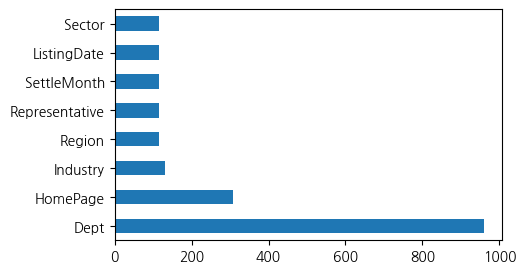

In [22]:
# plt.figure(figsize=(5,3)) # 너비 10인치, 높이가 5인치
temp.plot(kind='barh',figsize=(5,3))

<Axes: >

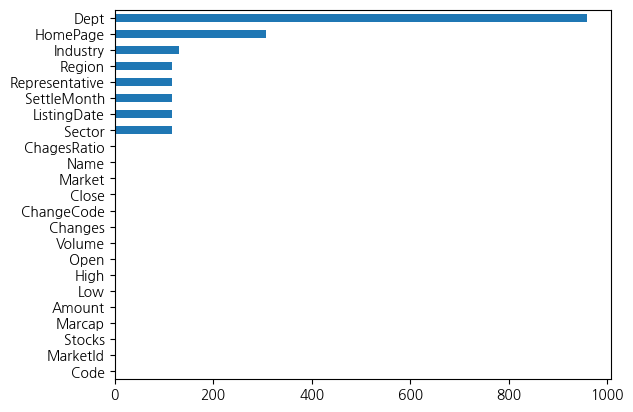

In [23]:
# print(df_stocks.isna().sum(axis=0).sort_values(ascending=False))
df_stocks.isna().sum(axis=0).sort_values(ascending=True).plot(kind='barh')
# temp.plot()

In [24]:
# 요약 기술 통계
df_stocks.describe()

,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2.855000e+03,2855.000000,2855.000000,2855.000000,2.855000e+03,2.855000e+03,2.855000e+03,2.855000e+03,2.855000e+03,2.855000e+03,2.855000e+03
mean,1.703885e+04,1.061296,518.086865,3.335247,1.633084e+04,1.690622e+04,1.622057e+04,1.754478e+05,1.822964e+09,8.047594e+11,4.187273e+07
std,5.332013e+04,0.507917,2300.370679,3.634495,5.153092e+04,5.373261e+04,5.066243e+04,1.038449e+06,1.077154e+10,7.254038e+12,1.328163e+08
min,2.000000e+00,0.000000,-4800.000000,-14.980000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.453333e+07,2.000000e+05
25%,2.067500e+03,1.000000,28.000000,1.230000,1.903000e+03,1.973500e+03,1.892500e+03,4.108000e+03,1.762919e+07,4.011806e+10,1.017186e+07
50%,4.690000e+03,1.000000,120.000000,2.990000,4.290000e+03,4.470000e+03,4.270000e+03,2.085700e+04,9.080145e+07,8.934285e+10,1.976823e+07
75%,1.240000e+04,1.000000,367.500000,4.680000,1.164000e+04,1.217000e+04,1.161000e+04,6.986150e+04,4.748317e+08,2.221801e+11,4.191386e+07
max,1.621000e+06,5.000000,86000.000000,29.980000,1.511000e+06,1.630000e+06,1.446000e+06,3.330538e+07,3.772405e+11,3.217713e+14,5.969783e+09


In [44]:
df_stocks.columns

Index(['Code', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode', 'Changes',
       'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount', 'Marcap',
       'Stocks', 'MarketId', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

#### 컬럼명 변경

In [25]:
stocks_columns = {'Code':'종목코드', 'Name':'종목명', 'Market':'시장', 'Dept':'부서(한국거래소)', 'Close':'종가', 'ChangeCode':'등락기호','Changes':'전일대비', 
                     'ChagesRatio':'전일대비 등락률', 'Open':'시가','High':'고가', 'Low':'저가', 'Volume':'거래량', 'Amount':'거래대금', 'Marcap':'시가총액(백만원)', 
                     'Stocks':'주식발행수', 'MarketId':'시장기호', 'Sector':'업종', 'Industry':'주요제품', 'ListingDate':'상장일', 
                     'SettleMonth':'결산월', 'Representative':'대표자명','HomePage':'홈페이지', 'Region':'지역'} 

In [26]:
# 컬럼명 변경
# inplace 매개변수 : 데이터프레임 원본을 수정하려면 True, 복사본을 반환받으려면 False
df_stocks.rename(columns = stocks_columns, inplace = True)

In [27]:
df_stocks.head(1)

,종목코드,종목명,시장,부서(한국거래소),종가,등락기호,전일대비,전일대비 등락률,시가,고가,저가,거래량,거래대금,시가총액(백만원),주식발행수,시장기호,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,005930,삼성전자,KOSPI,NaN,53900,1,500,0.94,54500,54500,53700,6965539,377240465300,321771279445000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도


In [28]:
# 범주형 데이터의 기술통계 
df_stocks.describe(include='O')

,종목코드,종목명,시장,부서(한국거래소),시장기호,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
count,2855,2855,2855,1896,2855,2739,2724,2739,2739,2739,2547,2739
unique,2855,2855,4,9,3,160,2526,2044,10,2607,2527,22
top,005930,삼성전자,KOSDAQ,우량기업부,KSQ,소프트웨어 개발 및 공급업,기업인수합병,1996-07-03,12월,김종현,http://www.moorim.co.kr,서울특별시
freq,1,1,1728,530,1776,185,53,8,2679,5,2,1108


In [30]:
# 유니크한 값의 목록(중복 제거한 목록)
print(df_stocks['시장'].value_counts())

시장
KOSDAQ           1728
KOSPI             959
KONEX             120
KOSDAQ GLOBAL      48
Name: count, dtype: int64


In [31]:
print(df_stocks['부서(한국거래소)'].value_counts())

부서(한국거래소)
우량기업부              530
중견기업부              487
벤처기업부              302
기술성장기업부            234
일반기업부              120
SPAC(소속부없음)         99
관리종목(소속부없음)         61
투자주의환기종목(소속부없음)     44
외국기업(소속부없음)         19
Name: count, dtype: int64


In [32]:
print(df_stocks['시장기호'].value_counts())

시장기호
KSQ    1776
STK     959
KNX     120
Name: count, dtype: int64


In [ ]:
df_stocks.plot?

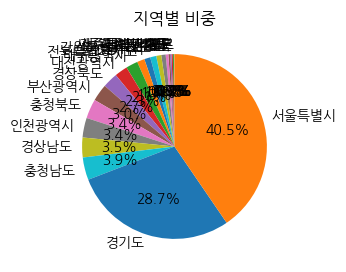

In [34]:
plt.figure(figsize=(5,3))
# print(df_stocks['지역'].value_counts())
df_stocks['지역'].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('지역별 비중') # 제목추가
plt.ylabel('') # 축 라벨 제거
plt.show() # 차트표시

In [35]:
print(df_stocks['업종'].value_counts())

업종
소프트웨어 개발 및 공급업    185
특수 목적용 기계 제조업     168
전자부품 제조업          130
금융 지원 서비스업        119
의약품 제조업           104
                 ... 
경비, 경호 및 탐정업        1
철도장비 제조업            1
개인 및 가정용품 임대업       1
인쇄 및 인쇄관련 산업        1
편조원단 제조업            1
Name: count, Length: 160, dtype: int64


업종
소프트웨어 개발 및 공급업                       185
특수 목적용 기계 제조업                        168
전자부품 제조업                             130
금융 지원 서비스업                           119
의약품 제조업                              104
기타 금융업                               102
자동차 신품 부품 제조업                        101
기타 화학제품 제조업                          100
반도체 제조업                               74
자연과학 및 공학 연구개발업                       71
의료용 기기 제조업                            67
통신 및 방송 장비 제조업                        64
1차 철강 제조업                             62
기초 화학물질 제조업                           51
일반 목적용 기계 제조업                         48
플라스틱제품 제조업                            44
기초 의약물질 제조업                           44
기타 전문 도매업                             42
컴퓨터 프로그래밍, 시스템 통합 및 관리업               41
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업     39
Name: count, dtype: int64


<Axes: title={'center': '빈도수 상위 30개 업종'}, ylabel='업종'>

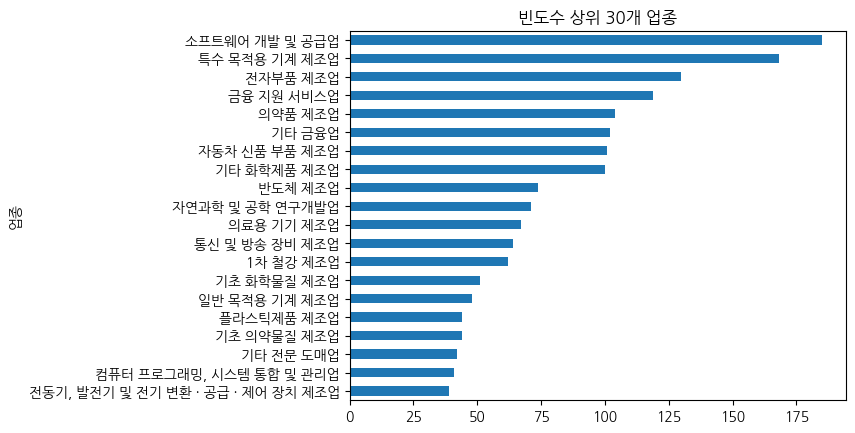

In [36]:
# 상위 30개 업종
print(df_stocks['업종'].value_counts().sort_values(ascending=False).head(20))
tmp = df_stocks['업종'].value_counts().sort_values(ascending=True).tail(20)
tmp.plot(kind='barh', title='빈도수 상위 30개 업종')